# Preparing the data for modeling

In [371]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)
#library(lightgbm)


In [372]:
data <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/Favorita__dffinal.csv")

In [373]:
dim(data)

[1] 18572    33

In [374]:
head(data)

,X,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,1652,0,0,0,0,7,22,0,0.03246823,...,0,0,1,0,0,1,0,0,0,5.509388
2,2,1796,0,0,0,0,7,22,0,0.03295283,...,0,0,1,0,0,1,0,0,0,4.553877
3,3,308,0,0,0,0,7,22,0,0.01717639,...,0,0,1,0,0,1,0,0,0,4.276666
4,4,1927,0,0,0,0,7,22,0,0.03273745,...,0,0,0,0,0,1,0,0,0,5.811141
5,5,808,0,0,0,0,7,22,0,0.02907603,...,0,0,1,0,0,1,0,0,0,3.091042
6,6,778,0,0,0,0,7,22,0,0.03020676,...,0,0,1,0,0,1,0,0,0,4.127134


In [375]:
data<-data[,-c(1)]

In [376]:
head(data)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,city_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1652,0,0,0,0,7,22,0,0.03246823,0.48906957,...,0,0,1,0,0,1,0,0,0,5.509388
2,1796,0,0,0,0,7,22,0,0.03295283,0.48906957,...,0,0,1,0,0,1,0,0,0,4.553877
3,308,0,0,0,0,7,22,0,0.01717639,0.12513461,...,0,0,1,0,0,1,0,0,0,4.276666
4,1927,0,0,0,0,7,22,0,0.03273745,0.48906957,...,0,0,0,0,0,1,0,0,0,5.811141
5,808,0,0,0,0,7,22,0,0.02907603,0.05928279,...,0,0,1,0,0,1,0,0,0,3.091042
6,778,0,0,0,0,7,22,0,0.03020676,0.03020676,...,0,0,1,0,0,1,0,0,0,4.127134


In [377]:
nm <- names(data)
nm

[1] "sumtaransactions" "locale_Ibarra"    "locale_Loja"      "locale_Manta"    
 [5] "locale_Quito"     "National_Ecuador" "maxoil"           "EQ_Impact"       
 [9] "store_pct"        "city_pct"         "cluster_pct"      "item_nbr_589403" 
[13] "item_nbr_699745"  "item_nbr_741201"  "item_nbr_804098"  "item_nbr_1110679"
[17] "item_nbr_1247036" "class_2802"       "class_2850"       "class_2854"      
[21] "class_2864"       "store_type_A"     "store_type_B"     "store_type_C"    
[25] "store_type_D"     "onpromotion_0"    "onpromotion_1"    "MM_1"            
[29] "MM_2"             "MM_3"             "MM_12"            "log_sales"

In [378]:
data[] <- lapply( data, factor) 

In [379]:
data$sumtaransactions<-as.numeric(data$sumtaransactions)
data$National_Ecuador<-as.numeric(data$National_Ecuador)
data$maxoil<-as.numeric(data$maxoil)
data$store_pct<-as.numeric(data$store_pct)
data$city_pct<-as.numeric(data$city_pct)
data$cluster_pct<-as.numeric(data$cluster_pct)
data$log_sales<-as.numeric(data$log_sales)

In [380]:
summary(data)

 sumtaransactions locale_Ibarra locale_Loja locale_Manta locale_Quito
 Min.   :   1     0:17312       0:17138     0:16919      0:17138     
 1st Qu.: 970     1: 1260       1: 1434     1: 1653      1: 1434     
 Median :1632                                                        
 Mean   :1520                                                        
 3rd Qu.:2141                                                        
 Max.   :2538                                                        
 National_Ecuador     maxoil      EQ_Impact   store_pct        city_pct    
 Min.   : 1.000   Min.   : 1.00   0:17764   Min.   : 1.00   Min.   : 1.00  
 1st Qu.: 1.000   1st Qu.: 7.00   1:  808   1st Qu.:25.00   1st Qu.:18.00  
 Median : 3.000   Median :10.00             Median :35.00   Median :21.00  
 Mean   : 4.155   Mean   :11.61             Mean   :32.57   Mean   :19.14  
 3rd Qu.: 6.000   3rd Qu.:17.00             3rd Qu.:42.00   3rd Qu.:22.00  
 Max.   :11.000   Max.   :24.00             Max.   :46

In [381]:
vn <- names(data)
vn

[1] "sumtaransactions" "locale_Ibarra"    "locale_Loja"      "locale_Manta"    
 [5] "locale_Quito"     "National_Ecuador" "maxoil"           "EQ_Impact"       
 [9] "store_pct"        "city_pct"         "cluster_pct"      "item_nbr_589403" 
[13] "item_nbr_699745"  "item_nbr_741201"  "item_nbr_804098"  "item_nbr_1110679"
[17] "item_nbr_1247036" "class_2802"       "class_2850"       "class_2854"      
[21] "class_2864"       "store_type_A"     "store_type_B"     "store_type_C"    
[25] "store_type_D"     "onpromotion_0"    "onpromotion_1"    "MM_1"            
[29] "MM_2"             "MM_3"             "MM_12"            "log_sales"

In [382]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

In [383]:
Table1(data = data,x = vn,y = "log_sales")

Warning message in Table1(data = data, x = vn, y = "log_sales"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

The dependent variable has more than 8 levels, table too large!



V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,18572
sumtaransactions,Mean (SD),"1,520.2 (705.6)"
sumtaransactions,Median (IQR),"1,632.0 (970.0-2,141.0)"
sumtaransactions,Missing (%),--
locale_Ibarra,0,"17,312 (93.2%)"
locale_Ibarra,1,"1,260 (6.8%)"
locale_Loja,0,"17,138 (92.3%)"
locale_Loja,1,"1,434 (7.7%)"


### Test Dataset ####

In [384]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 5, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |====================================================================  |  97%

 

You got a perfectly balanced training and test datasets

 



In [385]:
dim(temp)
dim(test)

[1] 14857    32

[1] 3715   32

In [386]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,18572,14857,3715,NA
sumtaransactions,Mean (SD),"1,520.2 (705.6)","1,517.0 (706.9)","1,532.8 (700.5)",NA
sumtaransactions,Median (IQR),"1,632.0 (970.0-2,141.0)","1,628.0 (965.0-2,141.0)","1,654.0 (976.5-2,143.5)",0.224
locale_Ibarra,1,"1,260 (6.8%)","1,023 (6.9%)",237 (6.4%),0.289
locale_Loja,1,"1,434 (7.7%)","1,133 (7.6%)",301 (8.1%),0.348
locale_Manta,1,"1,653 (8.9%)","1,324 (8.9%)",329 (8.9%),0.941
locale_Quito,1,"1,434 (7.7%)","1,133 (7.6%)",301 (8.1%),0.348
National_Ecuador,Mean (SD),4.2 (3.2),4.1 (3.2),4.2 (3.2),NA
National_Ecuador,Median (IQR),3.0 (1.0-6.0),3.0 (1.0-6.0),3.0 (1.0-6.0),0.21


In [387]:
tab1 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


### Train and Dev ###

In [388]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |====================================================================  |  97%

 

You got a perfectly balanced training and test datasets

 



In [389]:
dim(train)
dim(dev)

[1] 11885    32

[1] 2972   32

In [390]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,14857,11885,2972,NA
sumtaransactions,Mean (SD),"1,517.0 (706.9)","1,516.6 (705.5)","1,518.5 (712.7)",NA
sumtaransactions,Median (IQR),"1,628.0 (965.0-2,141.0)","1,629.0 (966.0-2,139.0)","1,625.0 (963.8-2,150.0)",0.895
locale_Ibarra,1,"1,023 (6.9%)",811 (6.8%),212 (7.1%),0.579
locale_Loja,1,"1,133 (7.6%)",915 (7.7%),218 (7.3%),0.529
locale_Manta,1,"1,324 (8.9%)","1,068 (9.0%)",256 (8.6%),0.548
locale_Quito,1,"1,133 (7.6%)",915 (7.7%),218 (7.3%),0.529
National_Ecuador,Mean (SD),4.1 (3.2),4.1 (3.2),4.1 (3.2),NA
National_Ecuador,Median (IQR),3.0 (1.0-6.0),3.0 (1.0-6.0),2.0 (1.0-6.0),0.886


In [391]:
tab2 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


Checking the distribution of the outcome on the three subsets

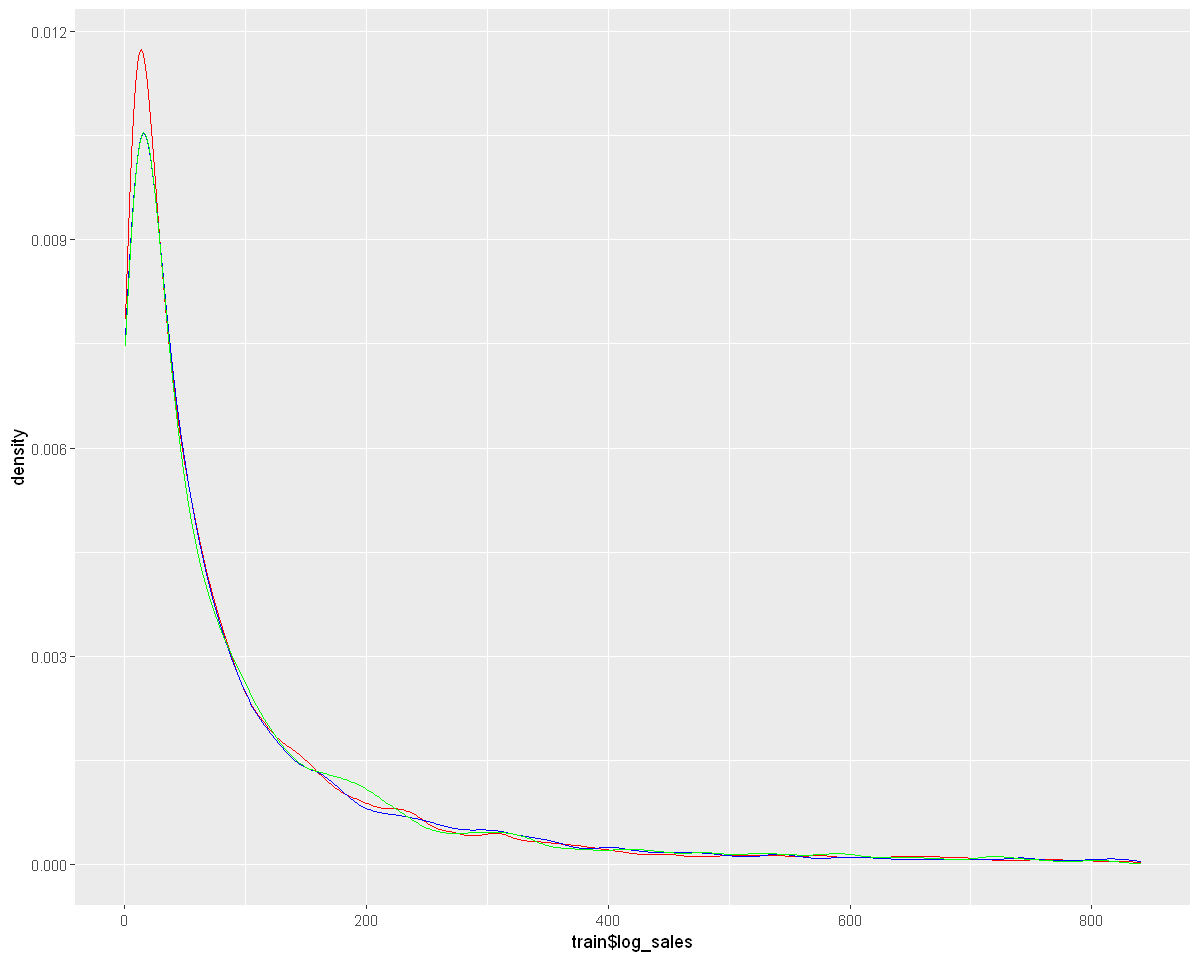

In [392]:
require(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot() +
    geom_density(aes(x=train$log_sales),color="red",alpha=0.3) +
    geom_density(aes(x=dev$log_sales),color="blue",alpha=0.3) +
    geom_density(aes(x=test$log_sales),color="green",alpha=0.3)


## Regression Models  ##

In [393]:
### The error we will use is the RMSE and RMSLE since we don't have outliers 

rmse_dev <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_dev <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}




In [394]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [395]:
# Linear Models

In [396]:
set.seed(123)
mod1 <- lm(log_sales ~., data=train)
summary(mod1)


Call:
lm(formula = log_sales ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-280.73  -61.64  -14.51   37.82  632.49 

Coefficients: (6 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.298e+01  9.280e+00   3.554 0.000381 ***
sumtaransactions   6.465e-02  2.427e-03  26.635  < 2e-16 ***
locale_Ibarra1     3.516e-01  3.871e+00   0.091 0.927632    
locale_Loja1      -2.911e+01  3.935e+00  -7.398 1.47e-13 ***
locale_Manta1      7.761e+00  3.450e+00   2.250 0.024479 *  
locale_Quito1             NA         NA      NA       NA    
National_Ecuador   2.974e-02  3.388e-01   0.088 0.930060    
maxoil            -1.854e-02  1.780e-01  -0.104 0.917016    
EQ_Impact1         2.455e+00  4.755e+00   0.516 0.605624    
store_pct          2.617e+00  2.407e-01  10.874  < 2e-16 ***
city_pct           1.131e+00  2.835e-01   3.988 6.72e-05 ***
cluster_pct       -5.595e+00  2.718e-01 -20.582  < 2e-16 ***
item_nbr

In [397]:
pred1 <- predict(mod1,newdata=dev)
rmse_dev(dev$log_sales,pred1)
rmsle_dev(dev$log_sales,pred1)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred1), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred1)))

Warning message in predict.lm(mod1, newdata = dev):
"prediction from a rank-deficient fit may be misleading"


[1] 101.7309

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 1.046009

Warning message in log(y_hat + 1):
"NaNs produced"


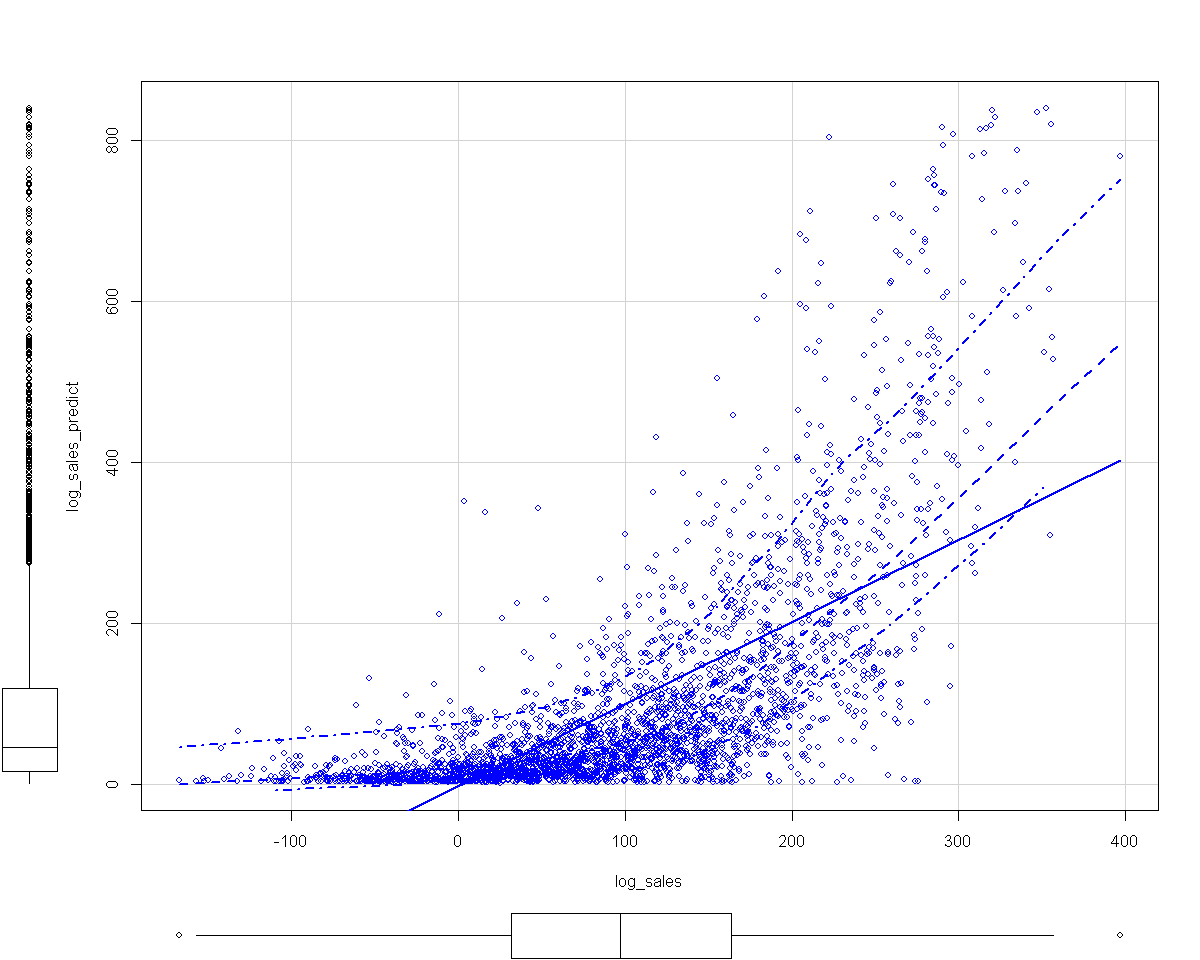

In [398]:
library(car)
scatterplot(log_sales ~ pred1 ,data=dev,
   xlab="log_sales", ylab="log_sales_predict")

In [399]:
# Desicion trees

In [400]:
library(tree)
library(rpart)

In [401]:
set.seed(123)
mod2 <- tree(log_sales ~., data=train)
mod2

ERROR while rich displaying an object: Error in cat(x, ..., sep = sep): argument 1 (type 'list') cannot be handled by 'cat'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. r

In [402]:
pred2 <- predict(mod2,newdata=dev)

rmse_dev(dev$log_sales,pred2)
rmsle_dev(dev$log_sales,pred2)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-tree", Model="mod2", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred2), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred2)))

[1] 86.922

[1] 1.030935

In [403]:
set.seed(123)
mod3 <- rpart(log_sales ~., data=train)
mod3

n= 11885 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 11885 223271100.0  98.72789  
    2) store_pct< 37.5 6819  30940930.0  51.36120  
      4) onpromotion_1=1 2927   2234739.0  22.18039 *
      5) onpromotion_1=0 3892  24339370.0  73.30678  
       10) sumtaransactions< 1048.5 1811   3715123.0  46.62341 *
       11) sumtaransactions>=1048.5 2081  18212680.0  96.52811  
         22) item_nbr_741201=0 1870  13498420.0  84.94492 *
         23) item_nbr_741201=1 211   2239758.0 199.18480 *
    3) store_pct>=37.5 5066 156437900.0 162.48500  
      6) onpromotion_1=1 2203  12312920.0  68.56695 *
      7) onpromotion_1=0 2863 109740900.0 234.75240  
       14) cluster_pct>=15.5 1310  27198550.0 157.92520  
         28) item_nbr_741201=0 1117  11343730.0 127.39120  
           56) class_2802=0 738   2612296.0  84.65854 *
           57) class_2802=1 379   4759607.0 210.60160 *
         29) item_nbr_741201=1 193   8786214.0 334.64250  
           58) sumtaransacti

In [404]:
pred3 <- predict(mod3,newdata=dev)
rmse_dev(dev$log_sales,pred3)
rmsle_dev(dev$log_sales,pred3)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod3", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred3), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred3)))

[1] 86.922

[1] 1.030935

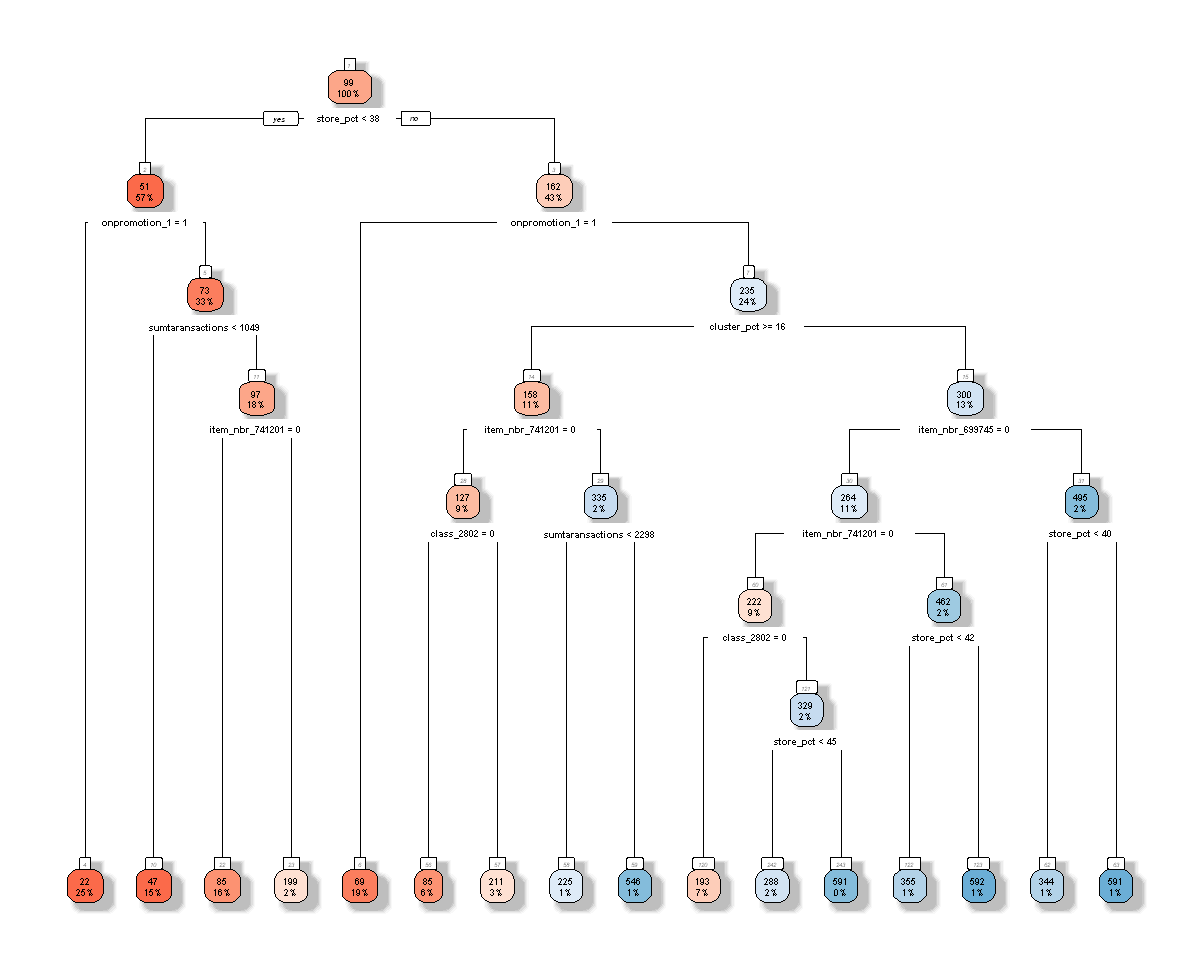

In [405]:
#Visualize the learned decision tree model
library(rpart.plot)
rpart.plot(mod3, box.palette="RdBu", shadow.col="gray", nn=TRUE,roundint=FALSE)

In [221]:
# Random Forest

In [406]:
library(randomForest)
library(ranger)

In [407]:
set.seed(123)
mod4 <- randomForest(log_sales ~., data=train)
mod4


Call:
 randomForest(formula = log_sales ~ ., data = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2684.595
                    % Var explained: 85.71

In [408]:
pred4 <- predict(mod4,newdata=dev)
rmse_dev(dev$log_sales,pred4)
rmsle_dev(dev$log_sales,pred4)
err_res <- rbind(err_res, data.frame(Name="RandomForest (RF)", Model="mod4", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred4), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred4)))

[1] 52.73429

[1] 0.654288

In [409]:
R_squre <- tibble(pred4, obs = dev$log_sales) %>% 
  mutate(resid = pred4 - obs,
         resid_sq = resid^2)
sstot <- sum((R_squre$pred4 - mean(R_squre$obs))^2)
ssresid <- sum(R_squre$resid_sq)
sprintf("Percent of Variance Explained, R^2: %1.1f%%", 100 * (1 - ssresid / sstot))

[1] "Percent of Variance Explained, R^2: 81.5%"

In [410]:
#mod41 <- randomForest(log_sales ~., data=train,importance=TRUE,ntree=400)
#mod41

In [411]:
mod5 <- ranger(log_sales ~., data=train)
mod5

Ranger result

Call:
 ranger(log_sales ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      11885 
Number of independent variables:  31 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       3248.338 
R squared (OOB):                  0.8271014 

In [412]:
pred5 <- predict(mod5,data=dev)

rmse_dev(dev$log_sales,pred5$predictions)
rmsle_dev(dev$log_sales,pred5$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod5", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred5$predictions), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred5$predictions)))

[1] 58.90842

[1] 0.7323507

In [231]:
#mod51 <- ranger(log_sales ~., data=train,num.trees= 800,min.node.size=1,sample.fraction=0.8,seed= 123)
#mod51

In [232]:
#  KNN

In [517]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

In [518]:
train1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = train_num)

In [519]:
dev1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = dev_num)

In [520]:
X_train <- sapply(data.frame(as.matrix(train1)),min_max)

In [521]:
X_dev <- sapply(data.frame(as.matrix(dev1)),min_max)

In [522]:
library(class)
mod6 <- knn(X_train,X_dev,cl=train$log_sales)

In [523]:
str(mod6)

 Factor w/ 757 levels "1","2","3","4",..: 60 5 3 41 84 38 213 218 327 5 ...


In [524]:
pred6 <- as.numeric(as.character(mod6))

rmse_dev(dev$log_sales,pred6)
rmsle_dev(dev$log_sales,pred6)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod6", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred6), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred6)))

[1] 100.8436

[1] 0.9142709

In [241]:
# SVM

In [421]:
#install.packages("liquidSVM")
library(liquidSVM)
mod7 <- svm(log_sales ~., train)

In [422]:
pred7 <- predict(mod7, newdata=dev)

rmse_dev(dev$log_sales,pred7)
rmsle_dev(dev$log_sales,pred7)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod7", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred7), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred7)))

[1] 66.7456

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.7979197

Warning message in log(y_hat + 1):
"NaNs produced"


In [ ]:
# XGBoost

In [541]:
library(xgboost)

In [542]:
train_num <- train
train_num[] <- sapply(train_num[], as.numeric) 
head(train_num)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,city_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8711,430,1,1,1,1,2,7,1,29,13,...,1,1,2,2,1,1,1,1,1,48
4375,1751,1,1,1,1,7,18,1,45,22,...,1,1,2,1,2,1,1,1,1,63
12841,1750,1,1,1,1,1,7,1,45,22,...,1,1,2,1,2,1,1,1,1,106
25,2161,1,1,1,1,7,22,1,39,22,...,1,1,2,1,1,2,1,1,1,462
3822,2444,1,1,1,1,5,19,1,45,22,...,1,1,1,1,2,1,1,1,1,52
15864,2277,1,1,2,1,1,11,1,41,22,...,1,1,1,2,1,1,1,2,1,399


In [543]:
summary(train_num)

 sumtaransactions locale_Ibarra    locale_Loja     locale_Manta 
 Min.   :   1     Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.: 966     1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.00  
 Median :1629     Median :1.000   Median :1.000   Median :1.00  
 Mean   :1517     Mean   :1.068   Mean   :1.077   Mean   :1.09  
 3rd Qu.:2139     3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.00  
 Max.   :2538     Max.   :2.000   Max.   :2.000   Max.   :2.00  
  locale_Quito   National_Ecuador     maxoil        EQ_Impact    
 Min.   :1.000   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 7.00   1st Qu.:1.000  
 Median :1.000   Median : 3.000   Median :10.00   Median :1.000  
 Mean   :1.077   Mean   : 4.142   Mean   :11.57   Mean   :1.043  
 3rd Qu.:1.000   3rd Qu.: 6.000   3rd Qu.:17.00   3rd Qu.:1.000  
 Max.   :2.000   Max.   :11.000   Max.   :24.00   Max.   :2.000  
   store_pct        city_pct      cluster_pct    item_nbr_589403
 Min.   : 1.00   M

In [544]:
dev_num <- dev
dev_num[] <- sapply(dev_num[], as.numeric) 
head(dev_num)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,city_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3878,2129,1,1,1,1,5,19,1,41,22,...,1,1,1,1,2,1,1,1,1,63
6413,1273,1,1,1,1,2,14,1,15,16,...,1,2,1,1,2,1,1,1,1,4
2194,1446,1,1,1,1,2,24,1,26,20,...,2,1,1,2,1,1,1,1,1,9
8704,527,1,1,1,1,2,7,1,11,21,...,1,1,1,1,2,1,1,1,1,34
8125,1741,1,1,1,1,2,7,1,31,15,...,1,1,2,1,2,1,1,1,1,63
11387,2062,1,1,1,1,4,4,2,34,19,...,1,1,1,1,2,1,1,1,1,13


In [545]:
summary(dev_num)

 sumtaransactions locale_Ibarra    locale_Loja     locale_Manta  
 Min.   :   5.0   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 963.8   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :1625.0   Median :1.000   Median :1.000   Median :1.000  
 Mean   :1518.5   Mean   :1.071   Mean   :1.073   Mean   :1.086  
 3rd Qu.:2150.0   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :2538.0   Max.   :2.000   Max.   :2.000   Max.   :2.000  
  locale_Quito   National_Ecuador     maxoil        EQ_Impact    
 Min.   :1.000   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 7.00   1st Qu.:1.000  
 Median :1.000   Median : 2.000   Median :11.00   Median :1.000  
 Mean   :1.073   Mean   : 4.132   Mean   :11.82   Mean   :1.043  
 3rd Qu.:1.000   3rd Qu.: 6.000   3rd Qu.:17.00   3rd Qu.:1.000  
 Max.   :2.000   Max.   :11.000   Max.   :24.00   Max.   :2.000  
   store_pct        city_pct      cluster_pct    item_nbr_589403
 Min.   : 1

In [546]:
train1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = train_num)

In [547]:
dev1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = dev_num)

In [548]:
#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- train$log_sales
set.seed(123)
mod8 <- xgboost(data=X_train,label=y_train, nrounds=150,print_every_n = 10)

[1]	train-rmse:130.098541 
[11]	train-rmse:55.606297 
[21]	train-rmse:47.351406 
[31]	train-rmse:43.580570 
[41]	train-rmse:40.163311 
[51]	train-rmse:38.330109 
[61]	train-rmse:36.598911 
[71]	train-rmse:35.175816 
[81]	train-rmse:33.689777 
[91]	train-rmse:32.708229 
[101]	train-rmse:31.582260 
[111]	train-rmse:30.858942 
[121]	train-rmse:29.299759 
[131]	train-rmse:27.954004 
[141]	train-rmse:27.217623 
[150]	train-rmse:26.731516 


In [549]:
#X_test <- xgb.DMatrix(test1)
X_dev <- dev1
y_dev <- dev$log_sales

pred8 <- predict(mod8,newdata=X_dev)
rmse_dev(y_dev,pred8)
rmsle_dev(y_dev,pred8)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod8", 
                                     RMSE_Dev=rmse_dev(y_dev,pred8), 
                                     RMSLE_Dev=rmsle_dev(y_dev,pred8)))

[1] 49.97225

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.6921642

Warning message in log(y_hat + 1):
"NaNs produced"


In [432]:
library(gbm)
# for reproducibility
set.seed(123)

# train GBM model
mod9 <- gbm(formula = log_sales ~ ., distribution = "gaussian",  data = train,  n.trees = 20000, interaction.depth = 1,
  shrinkage = 0.001,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
  )  


In [433]:
print(mod9)

gbm(formula = log_sales ~ ., distribution = "gaussian", data = train, 
    n.trees = 20000, interaction.depth = 1, shrinkage = 0.001, 
    cv.folds = 5, verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
20000 iterations were performed.
The best cross-validation iteration was 19999.
There were 31 predictors of which 19 had non-zero influence.


In [434]:
pred9 <- predict(mod9,newdata=dev)

rmse_dev(dev$log_sales,pred9)
rmsle_dev(dev$log_sales,pred9)
err_res <- rbind(err_res, data.frame(Name="GBM", Model="mod9", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred9), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred9)))

Using 19999 trees...




[1] 96.5255

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 1.016354

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 19999

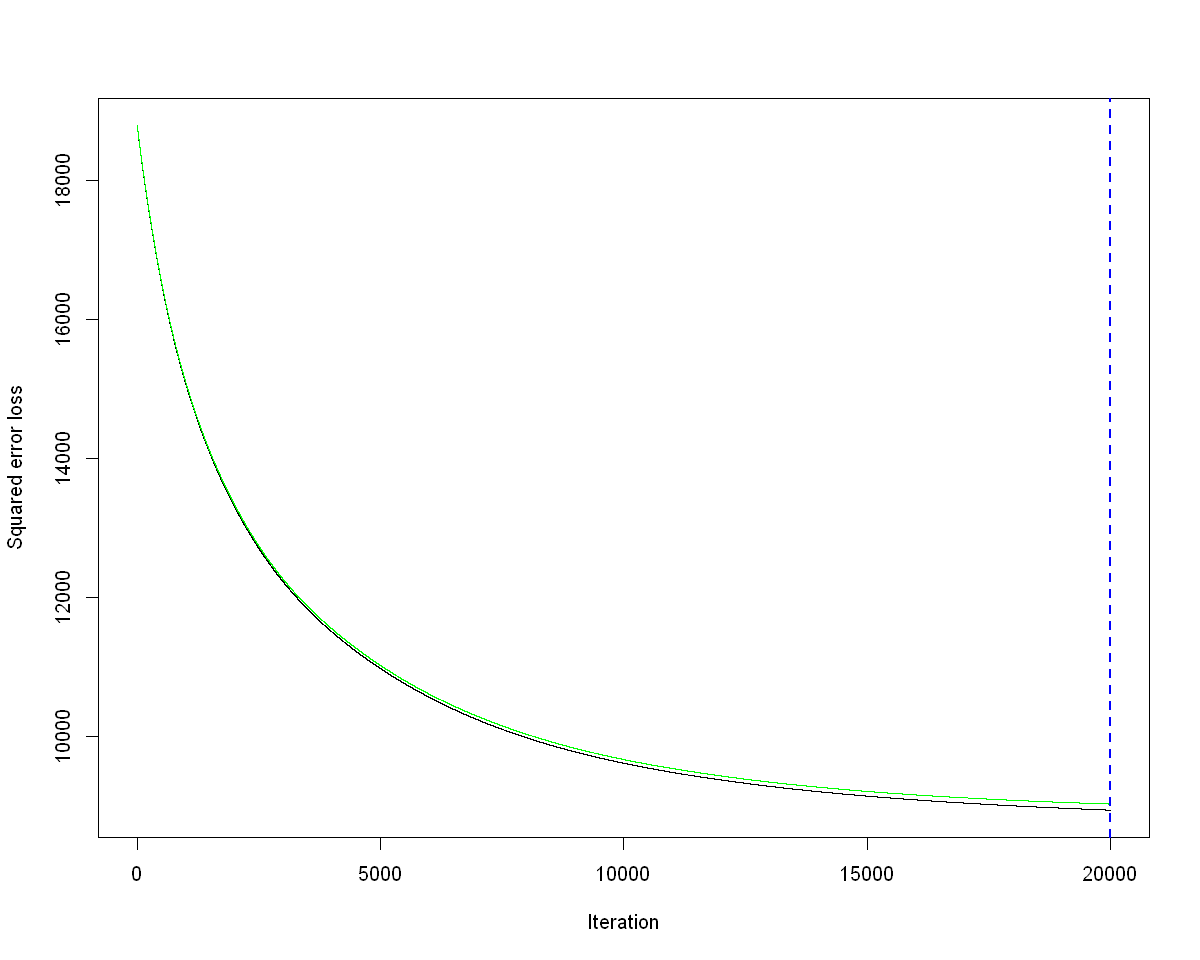

In [435]:
gbm.perf(mod9, method = "cv")

In [436]:
mod10 <- gbm(formula = log_sales ~ .,distribution = "gaussian", data = train, n.trees = 5000, interaction.depth = 3,
  shrinkage = 0.1,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
  )  

In [437]:
print(mod10)

gbm(formula = log_sales ~ ., distribution = "gaussian", data = train, 
    n.trees = 5000, interaction.depth = 3, shrinkage = 0.1, cv.folds = 5, 
    verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
5000 iterations were performed.
The best cross-validation iteration was 4947.
There were 31 predictors of which 27 had non-zero influence.


In [438]:
pred10 <- predict(mod10,newdata=dev)

rmse_dev(dev$log_sales,pred10)
rmsle_dev(dev$log_sales,pred10)
err_res <- rbind(err_res, data.frame(Name="GBM", Model="mod10", 
                                     RMSE_Dev=rmse_dev(dev$log_sales,pred10), 
                                     RMSLE_Dev=rmsle_dev(dev$log_sales,pred10)))

Using 4947 trees...




[1] 58.63346

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.7995394

Warning message in log(y_hat + 1):
"NaNs produced"


In [ ]:
gbm.perf(mod10, method = "cv")

check Light XGB


lgb.grid = list(objective = "binary",
                metric = "auc",
                min_sum_hessian_in_leaf = 1,
                feature_fraction = 0.7,
                bagging_fraction = 0.7,
                bagging_freq = 5,
                min_data = 100,
                max_bin = 50,
                lambda_l1 = 8,
                lambda_l2 = 1.3,
                min_data_in_bin=100,
                min_gain_to_split = 10,
                min_data_in_leaf = 30,
                is_unbalance = TRUE)

#### Gini for Lgb
lgb.normalizedgini = function(preds, dtrain){
  actual = getinfo(dtrain, "label")
  score  = NormalizedGini(preds,actual)
  return(list(name = "gini", value = score, higher_better = TRUE))
}

lgb.model = lgb(params = lgb.grid, data=x_train, label=y_train, learning_rate = 0.02,
                      num_leaves = 25, num_threads = 2 , nrounds = best.iter,
                      eval_freq = 20, eval = lgb.normalizedgini,
                      categorical_feature = categoricals.vec)

preds = data.table(id=test_ids, target=predict(lgb.model,test_sparse))
colnames(preds)[1] = "id"
fwrite(preds, "submission.csv")

In [439]:
Results_Dev <-err_res %>% arrange(RMSLE_Dev) 
Results_Dev

Name,Model,RMSE_Dev,RMSLE_Dev
<chr>,<chr>,<dbl>,<dbl>
RandomForest (RF),mod4,52.73429,0.6542880
XGBoost,mod8,49.97225,0.6921642
RandomForest (ranger),mod5,58.90842,0.7323507
SVM,mod7,66.74560,0.7979197
GBM,mod10,58.63346,0.7995394
kNN,mod6,100.84361,0.9142709
GBM,mod9,96.52550,1.0163539
Decision Trees-tree,mod2,86.92200,1.0309348
Decision Trees-rpart,mod3,86.92200,1.0309348


In [553]:
### The error we will use is the RMSE and RMSLE since we don't have outliers 

rmse_train <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_train <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}




In [554]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res_train <- NULL

In [555]:
pred1_train <- predict(mod1,newdata=train)
rmse_train(train$log_sales,pred1_train)
rmsle_train(train$log_sales,pred1_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE_Train=rmse_train(train$log_sales,pred1_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred1_train)))

Warning message in predict.lm(mod1, newdata = train):
"prediction from a rank-deficient fit may be misleading"


[1] 99.74785

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 1.015624

Warning message in log(y_hat + 1):
"NaNs produced"


In [556]:
pred2_train <- predict(mod2,newdata=train)

rmse_train(train$log_sales,pred2_train)
rmsle_train(train$log_sales,pred2_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Decision Trees-tree", Model="mod2", 
                                     RMSE_Train=rmse_train(train$log_sales,pred2_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred2_train)))

[1] 81.89647

[1] 1.007173

In [557]:
pred3_train <- predict(mod3,newdata=train)
rmse_train(train$log_sales,pred3_train)
rmsle_train(train$log_sales,pred3_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Decision Trees-rpart", Model="mod3", 
                                     RMSE_Train=rmse_train(train$log_sales,pred3_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred3_train)))

[1] 81.89647

[1] 1.007173

In [558]:
pred4_train <- predict(mod4,newdata=train)
rmse_train(train$log_sales,pred4_train)
rmsle_train(train$log_sales,pred4_train)
err_res_train <- rbind(err_res_train, data.frame(Name="RandomForest (RF)", Model="mod4", 
                                     RMSE_Train=rmse_train(train$log_sales,pred4_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred4_train)))

[1] 29.89601

[1] 0.4259278

In [559]:
pred5_train <- predict(mod5,data=train)

rmse_train(train$log_sales,pred5_train$predictions)
rmsle_train(train$log_sales,pred5_train$predictions)
err_res_train <- rbind(err_res_train, data.frame(Name="RandomForest (ranger)", Model="mod5", 
                                     RMSE_Train=rmse_train(train$log_sales,pred5_train$predictions), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred5_train$predictions)))

[1] 44.06971

[1] 0.5872118

In [560]:
# לטפל בשני המצבים במודל KNN

In [561]:
pred7_train <- predict(mod7, newdata=train)
rmse_train(train$log_sales,pred7_train)
rmsle_train(train$log_sales,pred7_train)
err_res_train <- rbind(err_res_train, data.frame(Name="SVM", Model="mod7", 
                                     RMSE_Train=rmse_train(train$log_sales,pred7_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred7_train)))

[1] 50.72907

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.6898921

Warning message in log(y_hat + 1):
"NaNs produced"


In [565]:
pred8_train <- predict(mod8,newdata=X_train)
rmse_train(y_train,pred8_train)
rmsle_train(y_train,pred8_train)
err_res_train <- rbind(err_res_train, data.frame(Name="XGBoost", Model="mod8", 
                                     RMSE_Train=rmse_train(train$log_sales,pred8_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred8_train)))

[1] 26.73151

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.5361831

Warning message in log(y_hat + 1):
"NaNs produced"


In [562]:
pred9_train<- predict(mod9,newdata=train)
rmse_train(train$log_sales,pred9_train)
rmsle_train(train$log_sales,pred9_train)
err_res_train <- rbind(err_res_train, data.frame(Name="GBM", Model="mod9", 
                                     RMSE_Train=rmse_train(train$log_sales,pred9_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred9_train)))

Using 19999 trees...




[1] 94.53812

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.9956426

Warning message in log(y_hat + 1):
"NaNs produced"


In [563]:
pred10_train <- predict(mod10,newdata=train)

rmse_train(train$log_sales,pred10_train)
rmsle_train(train$log_sales,pred10_train)
err_res_train <- rbind(err_res_train, data.frame(Name="GBM", Model="mod10", 
                                     RMSE_Train=rmse_train(train$log_sales,pred10_train), 
                                     RMSLE_Train=rmsle_train(train$log_sales,pred10_train)))

Using 4947 trees...




[1] 47.33214

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.7403011

Warning message in log(y_hat + 1):
"NaNs produced"


In [566]:
Results_Train <-err_res_train %>% arrange(RMSLE_Train) 
Results_Train

Name,Model,RMSE_Train,RMSLE_Train
<chr>,<chr>,<dbl>,<dbl>
RandomForest (RF),mod4,29.89601,0.4259278
XGBoost,mod8,26.73151,0.5361831
RandomForest (ranger),mod5,44.06971,0.5872118
SVM,mod7,50.72907,0.6898921
GBM,mod10,47.33214,0.7403011
GBM,mod9,94.53812,0.9956426
Decision Trees-tree,mod2,81.89647,1.0071729
Decision Trees-rpart,mod3,81.89647,1.0071729
Base Linear regression,mod1,99.74785,1.0156245


In [567]:
left_join(Results_Dev, Results_Train)

Joining, by = c("Name", "Model")



Name,Model,RMSE_Dev,RMSLE_Dev,RMSE_Train,RMSLE_Train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
RandomForest (RF),mod4,52.73429,0.6542880,29.89601,0.4259278
XGBoost,mod8,49.97225,0.6921642,26.73151,0.5361831
RandomForest (ranger),mod5,58.90842,0.7323507,44.06971,0.5872118
SVM,mod7,66.74560,0.7979197,50.72907,0.6898921
GBM,mod10,58.63346,0.7995394,47.33214,0.7403011
kNN,mod6,100.84361,0.9142709,NA,NA
GBM,mod9,96.52550,1.0163539,94.53812,0.9956426
Decision Trees-tree,mod2,86.92200,1.0309348,81.89647,1.0071729
Decision Trees-rpart,mod3,86.92200,1.0309348,81.89647,1.0071729


In [ ]:
# Model 8 RMSLE_Train ~ 0.5361831 vs. RMSLE_Dev ~ 0.6921642 -----> no over fitting ------> can proceed

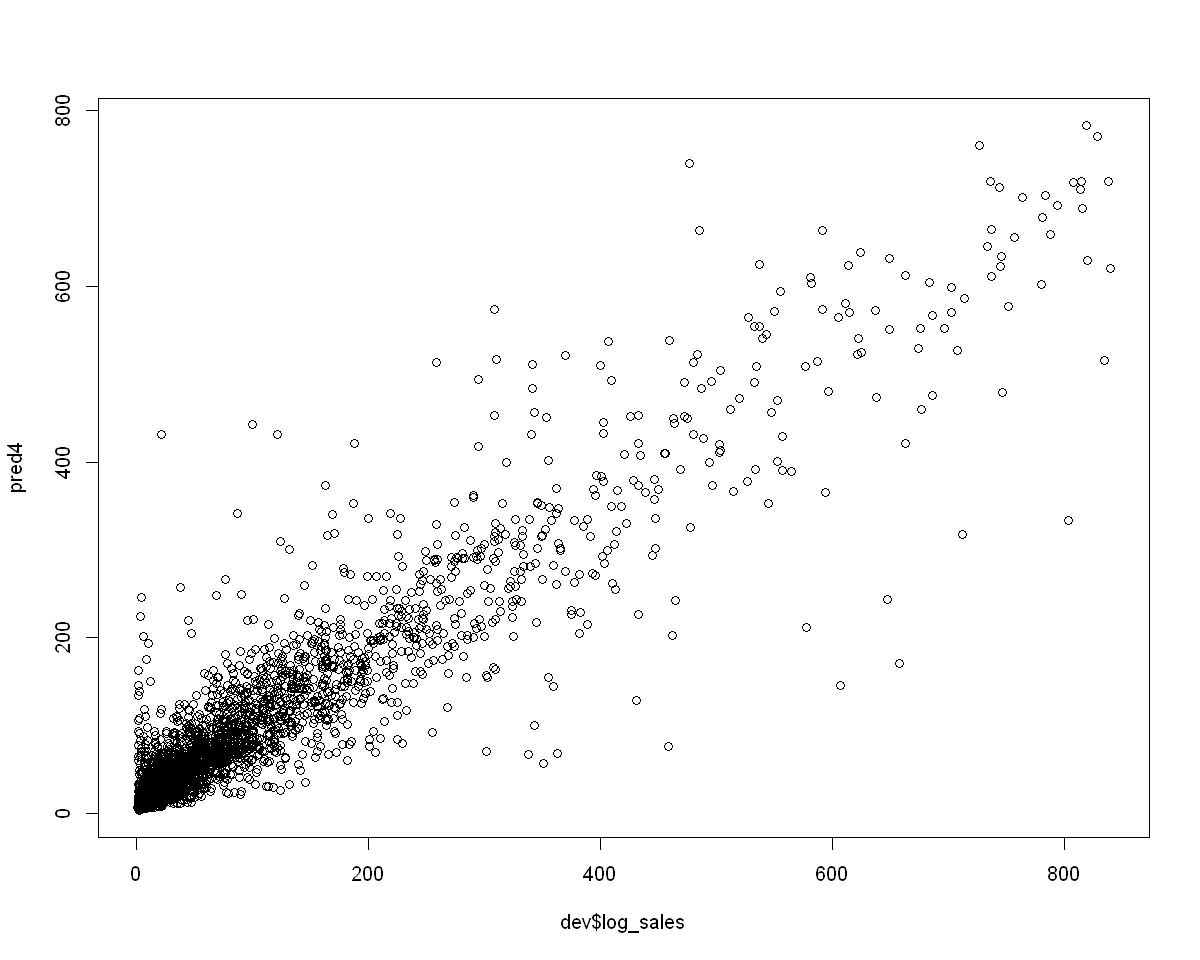

In [368]:
plot(pred4 ~ dev$log_sales)

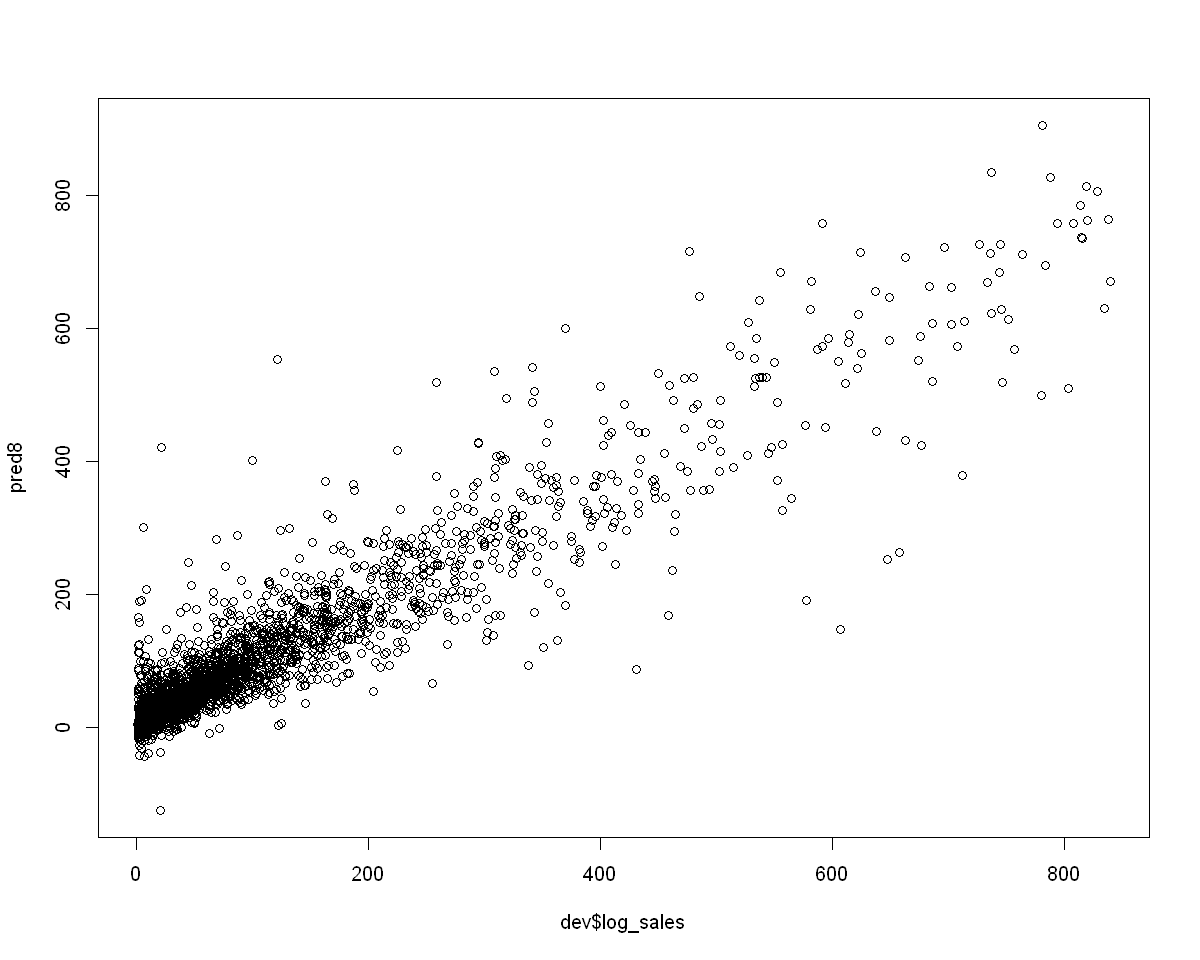

In [342]:
plot(pred8 ~ dev$log_sales)

In [343]:
## We'll choose model 8 - XGBoost since it is on 2nd place in terms of RMSLE and 1st in terms of RMSE.
## Also its graph looks better

In [344]:
#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- train$log_sales
set.seed(12)
mod11 <- xgboost(data=X_train,label=y_train, nrounds=500,print_every_n = 50,max.depth = 10,learning_rate:0.001,
                 gamma=0.3,eta=0.01,min_child_weight=3,subsample=0.7,colsample_bytree=0.7)
                

[1]	train-rmse:167.519531 
[51]	train-rmse:113.963409 
[101]	train-rmse:81.982903 
[151]	train-rmse:62.102406 
[201]	train-rmse:50.394306 
[251]	train-rmse:43.098682 
[301]	train-rmse:38.224609 
[351]	train-rmse:34.969097 
[401]	train-rmse:32.449852 
[451]	train-rmse:30.650753 
[500]	train-rmse:29.264832 


In [346]:
#X_test <- xgb.DMatrix(test1)
X_dev <- dev1
y_dev <- dev$log_sales

pred11 <- predict(mod11,newdata=X_dev)
rmse_dev(y_dev,pred11)
rmsle_dev(y_dev,pred11)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod11", 
                                     RMSE_Dev=rmse_dev(y_dev,pred11), 
                                     RMSLE_Dev=rmsle_dev(y_dev,pred11)))

[1] 48.68064

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.619077

Warning message in log(y_hat + 1):
"NaNs produced"


In [347]:
R_squre <- tibble(pred11, obs = dev$log_sales) %>% 
  mutate(resid = pred11 - obs,
         resid_sq = resid^2)
sstot <- sum((R_squre$pred11 - mean(R_squre$obs))^2)
ssresid <- sum(R_squre$resid_sq)
sprintf("Percent of Variance Explained, R^2: %1.1f%%", 100 * (1 - ssresid / sstot))

[1] "Percent of Variance Explained, R^2: 84.2%"

Final Model - # 12

In [348]:
X_train <- train1
y_train <- train$log_sales
set.seed(123)
mod12 <- xgboost(data=X_train,label=y_train, nrounds=500,print_every_n = 50,max.depth = 10,min_child_weight=6,
                eta=0.05)

[1]	train-rmse:161.274780 
[51]	train-rmse:40.182568 
[101]	train-rmse:28.927046 
[151]	train-rmse:25.589277 
[201]	train-rmse:22.968740 
[251]	train-rmse:21.191523 
[301]	train-rmse:20.126997 
[351]	train-rmse:19.158098 
[401]	train-rmse:18.513319 
[451]	train-rmse:17.865463 
[500]	train-rmse:17.308502 


In [349]:
#X_test <- xgb.DMatrix(test1)
X_dev <- dev1
y_dev <- dev$log_sales
set.seed(123)
pred12 <- predict(mod12,newdata=X_dev)
rmse_dev(y_dev,pred12)
rmsle_dev(y_dev,pred12)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod12", 
                                     RMSE_Dev=rmse_dev(y_dev,pred12), 
                                     RMSLE_Dev=rmsle_dev(y_dev,pred12)))

[1] 45.68291

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.6090397

Warning message in log(y_hat + 1):
"NaNs produced"


In [350]:
R_squre <- tibble(pred12, obs = dev$log_sales) %>% 
  mutate(resid = pred12 - obs,
         resid_sq = resid^2)
sstot <- sum((R_squre$pred12 - mean(R_squre$obs))^2)
ssresid <- sum(R_squre$resid_sq)
sprintf("Percent of Variance Explained, R^2: %1.1f%%", 100 * (1 - ssresid / sstot))

[1] "Percent of Variance Explained, R^2: 87.8%"

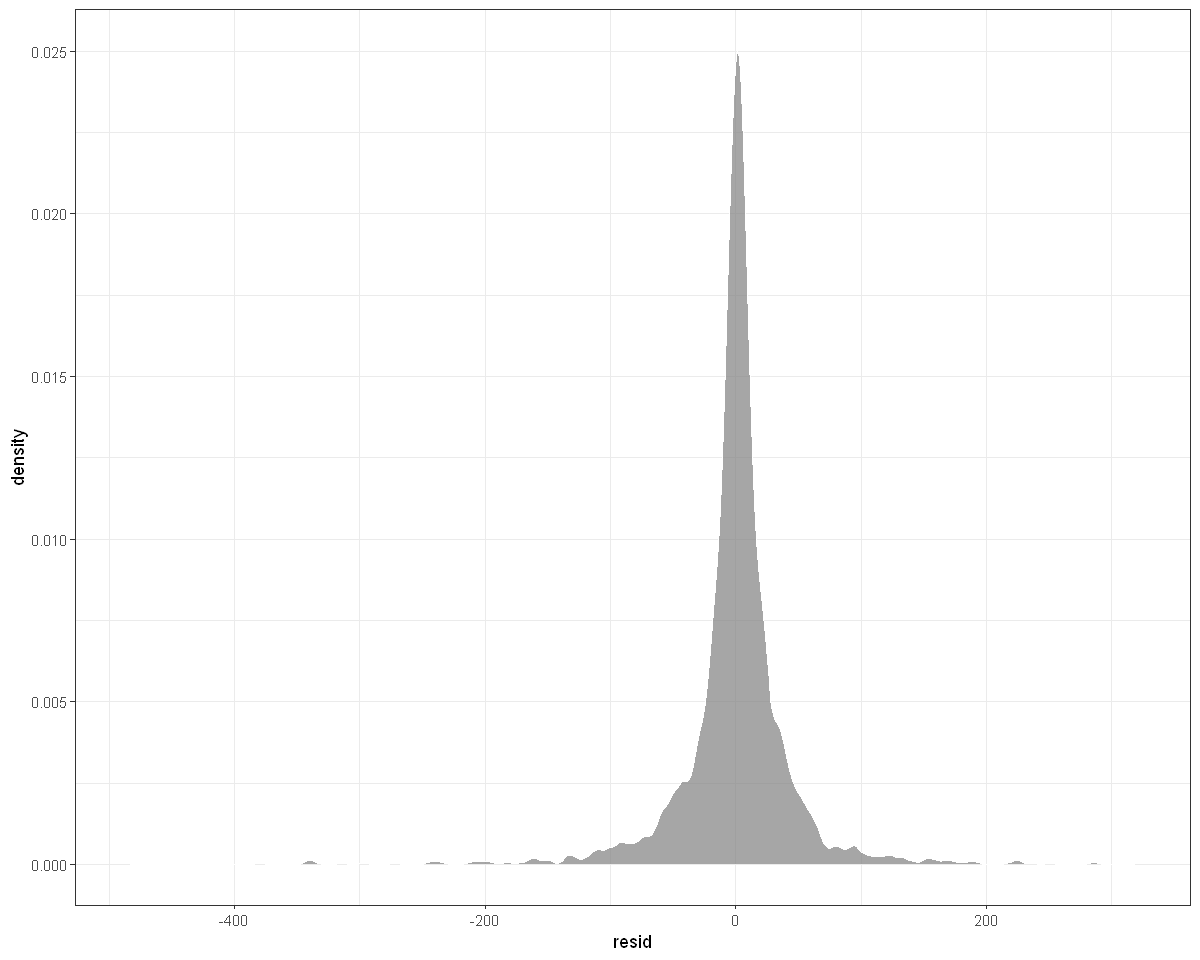

In [351]:
# Density plot of residuals
ggplot(R_squre, aes(x = resid)) +
  geom_density(fill = 'grey50', color = 'white', alpha = 0.7) +
  theme_bw()

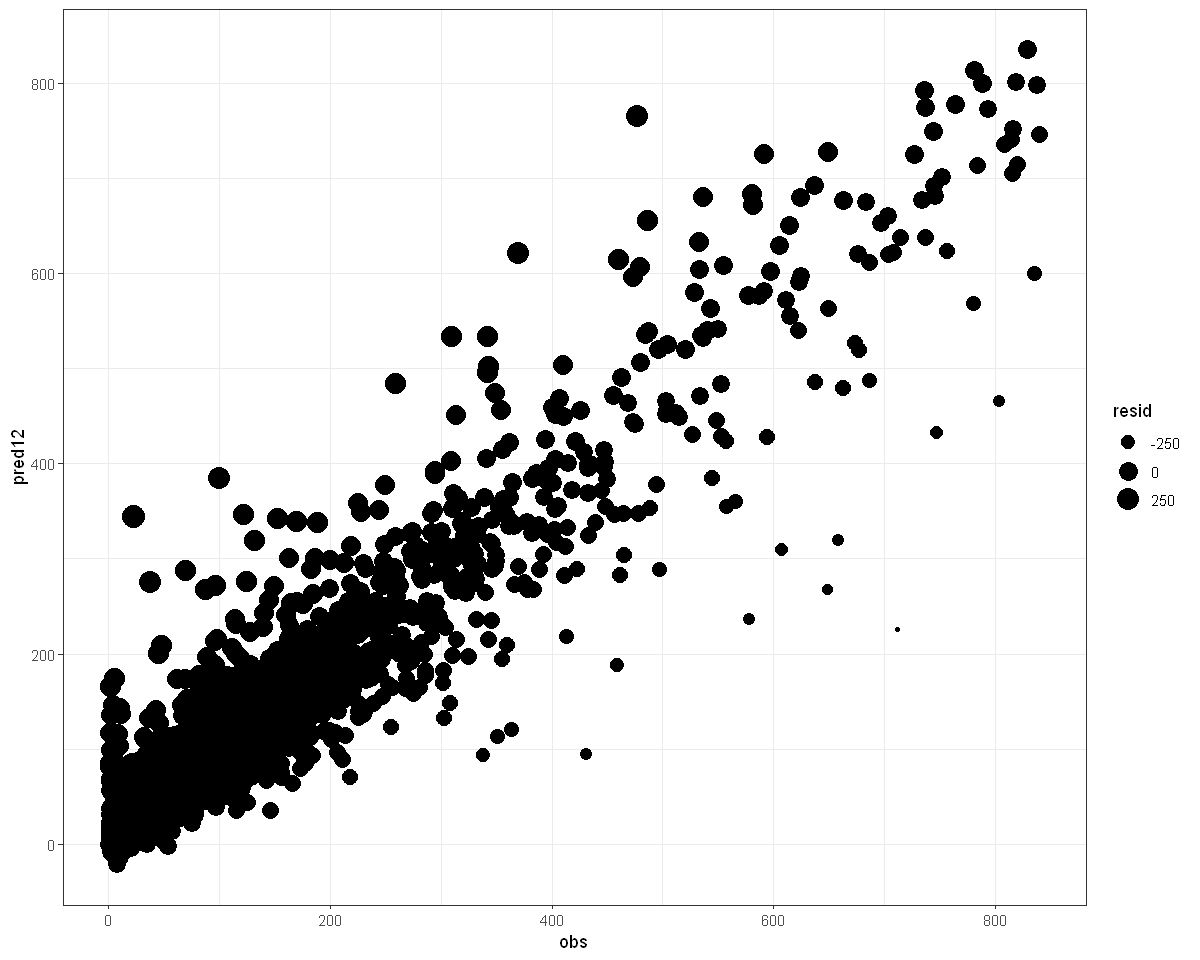

In [352]:
# Observed and Predicted
ggplot(R_squre, aes(x = obs, y = pred12, size = resid)) +
  geom_point() +
  theme_bw()

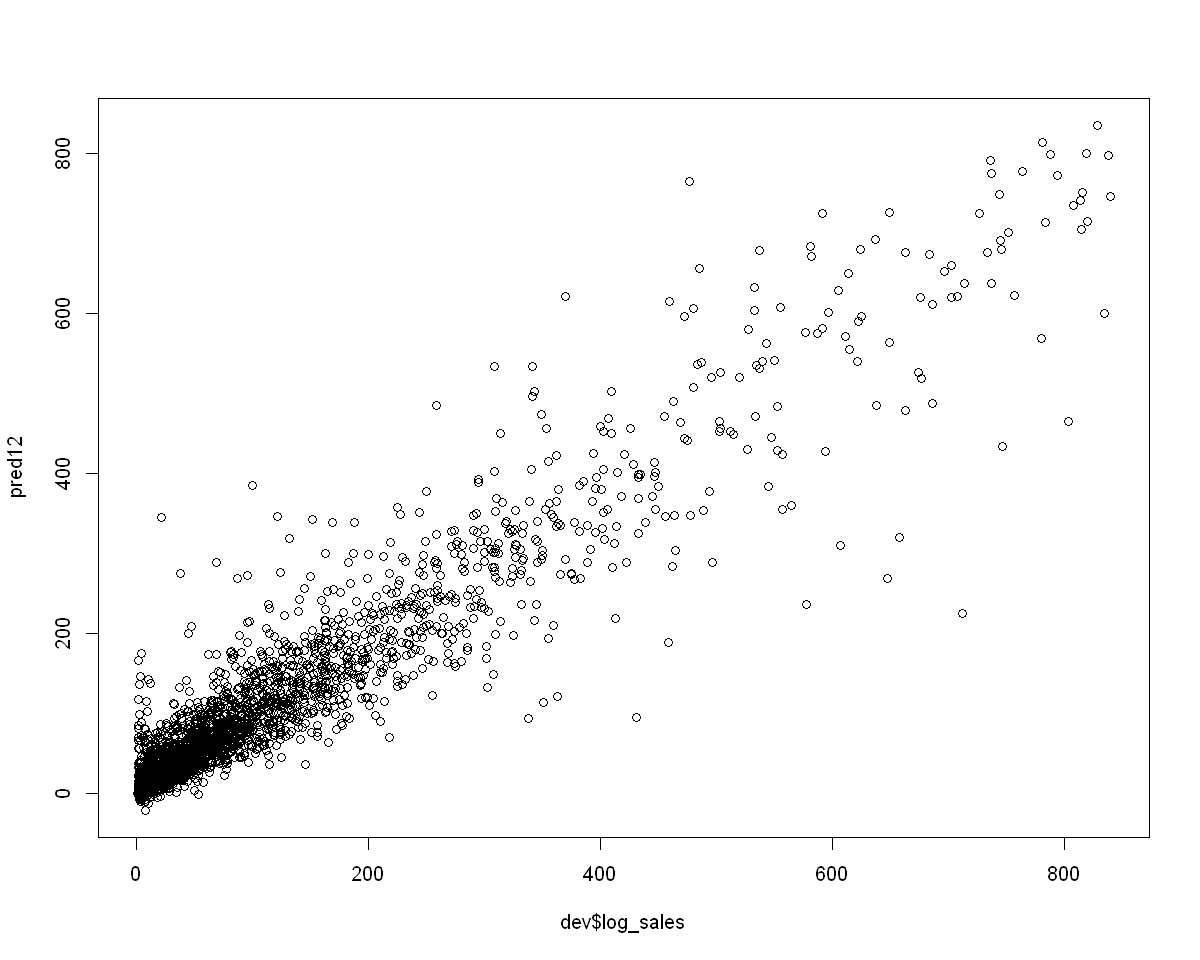

In [353]:
plot(pred12 ~ dev$log_sales)

             Feature         Gain       Cover    Frequency   Importance
 1:        store_pct 0.2517489452 0.096457564 0.0942454665 0.2517489452
 2:    onpromotion_1 0.1856199841 0.021539080 0.0198432189 0.1856199841
 3: sumtaransactions 0.1168285353 0.510039007 0.3003104187 0.1168285353
 4:  item_nbr_741201 0.0925486094 0.016271906 0.0204326215 0.0925486094
 5:      cluster_pct 0.0860109021 0.042166688 0.0568085817 0.0860109021
 6:       class_2802 0.0783348458 0.018028388 0.0299121790 0.0783348458
 7:           maxoil 0.0402120294 0.080776131 0.1421245997 0.0402120294
 8:  item_nbr_699745 0.0374690881 0.020062975 0.0263364703 0.0374690881
 9:  item_nbr_589403 0.0222119959 0.009031463 0.0223383564 0.0222119959
10: National_Ecuador 0.0185627945 0.029473406 0.0858464803 0.0185627945
11: item_nbr_1247036 0.0165435084 0.020502527 0.0205701487 0.0165435084
12:    onpromotion_0 0.0142498618 0.009659004 0.0499223953 0.0142498618
13:         city_pct 0.0125088225 0.028474793 0.0327609580 0.012

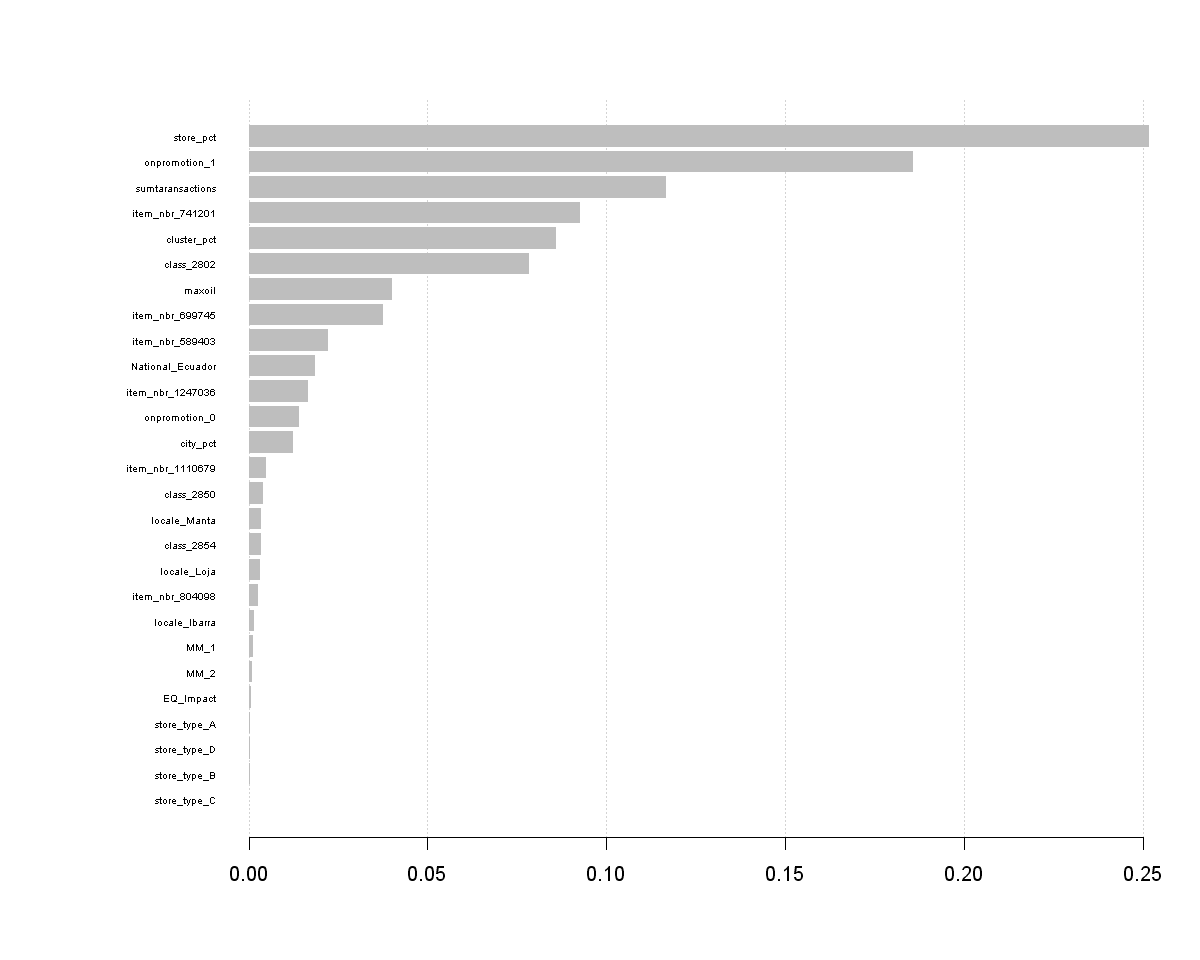

In [354]:
importance <- xgb.importance(feature_names = X_train@Dimnames[[2]], model = mod12)
print(xgb.plot.importance(importance_matrix = importance))

            Feature       Gain      Cover  Frequency Importance
1:        store_pct 0.25174895 0.09645756 0.09424547 0.25174895
2:    onpromotion_1 0.18561998 0.02153908 0.01984322 0.18561998
3: sumtaransactions 0.11682854 0.51003901 0.30031042 0.11682854
4:  item_nbr_741201 0.09254861 0.01627191 0.02043262 0.09254861
5:      cluster_pct 0.08601090 0.04216669 0.05680858 0.08601090


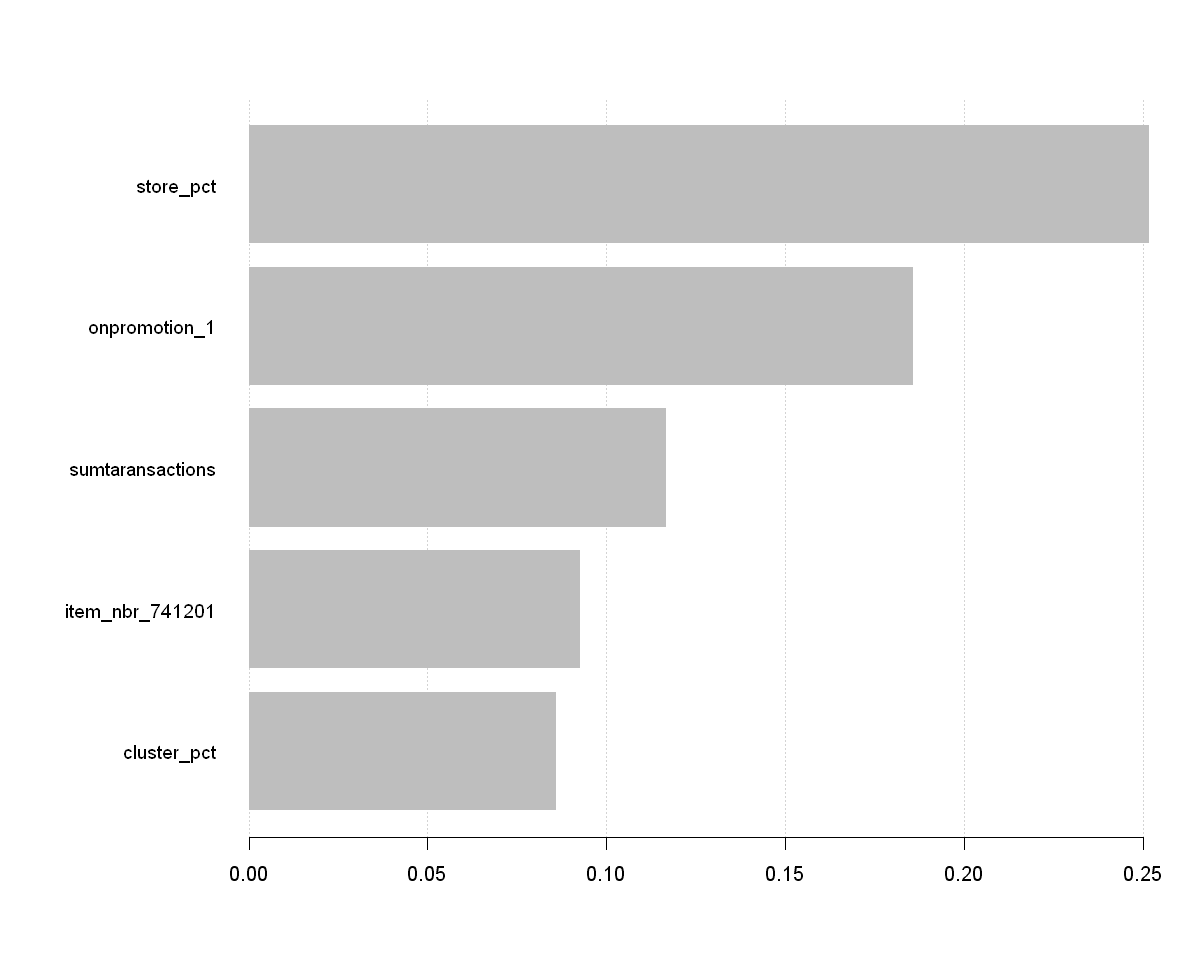

In [355]:
print(xgb.plot.importance(importance_matrix = importance, top_n = 5))

In [ ]:
# Model 12 is after tuning the origin Model (#8)
# Now we should run the final model on the test dataset. We should obtain the same score

In [356]:
test_num <- test
test_num[] <- sapply(test_num[], as.numeric) 
head(test_num)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,city_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,293,1,1,1,1,7,22,1,30,16,...,1,1,2,1,1,2,1,1,1,6
15,2353,1,1,1,1,7,22,1,42,22,...,1,1,1,1,1,2,1,1,1,600
19,2336,1,1,1,1,7,22,1,44,22,...,1,1,1,1,1,2,1,1,1,79
33,2336,1,1,1,1,7,22,1,44,22,...,1,1,1,1,1,2,1,1,1,748
36,1310,1,1,1,1,7,22,1,36,20,...,1,1,2,1,1,2,1,1,1,98
37,2177,1,1,1,1,7,22,1,44,22,...,1,1,1,1,1,2,1,1,1,161


In [357]:
test1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = test_num)

In [358]:
X_test <- test1
y_test <- test$log_sales


In [359]:
set.seed(123)
predtest <- predict(mod12,newdata=X_test)
rmse_dev(y_test,predtest)
rmsle_dev(y_test,predtest)
err_res <- rbind(err_res, data.frame(Name="XGBoost_on_test", Model="mod12_test", 
                                     RMSE_Dev=rmse_dev(y_test,pred12), 
                                     RMSLE_Dev=rmsle_dev(y_test,pred12)))

[1] 46.61163

Warning message in log(y_hat + 1):
"NaNs produced"


[1] 0.5848925

Warning message in y_hat - y:
"longer object length is not a multiple of shorter object length"
Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1) - log(y + 1):
"longer object length is not a multiple of shorter object length"


In [360]:
R_squre <- tibble(predtest, obstest = test$log_sales) %>% 
  mutate(resid = predtest - obstest,
         resid_sq = resid^2)
sstot <- sum((R_squre$predtest - mean(R_squre$obstest))^2)
ssresid <- sum(R_squre$resid_sq)
sprintf("Percent of Variance Explained, R^2: %1.1f%%", 100 * (1 - ssresid / sstot))

[1] "Percent of Variance Explained, R^2: 87.3%"

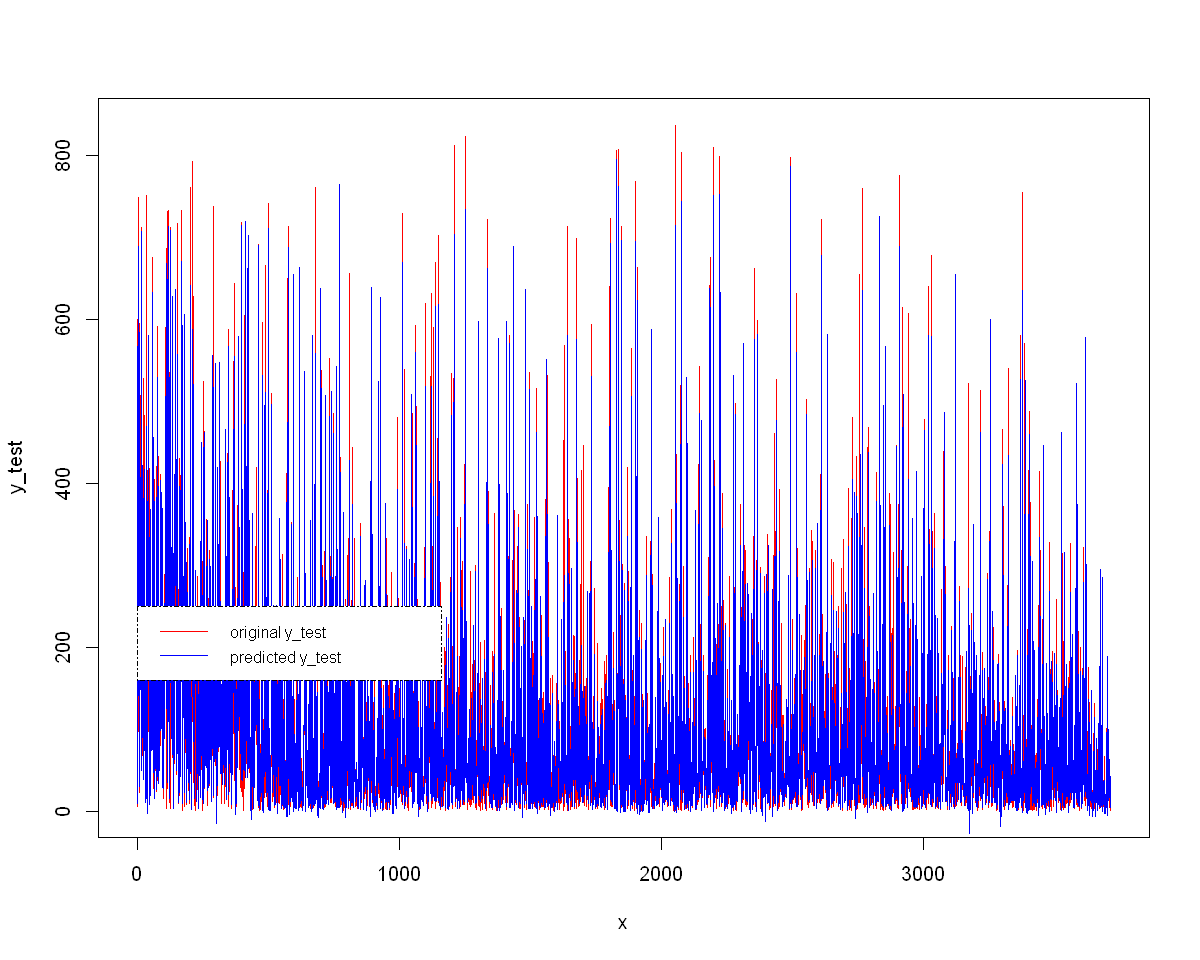

In [361]:
x = 1:length(y_test)
plot(x, y_test, col = "red", type = "l")
lines(x, predtest, col = "blue", type = "l")
legend(x = 1, y = 250,  legend = c("original y_test", "predicted y_test"), 
       col = c("red", "blue"), box.lty = 10, cex = 0.8, lty = c(1, 1))